In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math
from math import radians, cos, sin, sqrt, atan2


file_name = 'trip_data_1.csv'

with open(file_name, 'r') as file:
    reader = csv.reader(file)
    header = next(reader)
    row_count = 0

    for row in reader:
        print(row)
        row_count += 1
        if row_count >= 5:
            break

['89D227B655E5C82AECF13C3F540D4CF4', 'BA96DE419E711691B9445D6A6307C170', 'CMT', '1', 'N', '2013-01-01 15:11:48', '2013-01-01 15:18:10', '4', '382', '1.00', '-73.978165', '40.757977', '-73.989838', '40.751171']
['0BD7C8F5BA12B88E0B67BED28BEA73D8', '9FD8F69F0804BDB5549F40E9DA1BE472', 'CMT', '1', 'N', '2013-01-06 00:18:35', '2013-01-06 00:22:54', '1', '259', '1.50', '-74.006683', '40.731781', '-73.994499', '40.75066']
['0BD7C8F5BA12B88E0B67BED28BEA73D8', '9FD8F69F0804BDB5549F40E9DA1BE472', 'CMT', '1', 'N', '2013-01-05 18:49:41', '2013-01-05 18:54:23', '1', '282', '1.10', '-74.004707', '40.73777', '-74.009834', '40.726002']
['DFD2202EE08F7A8DC9A57B02ACB81FE2', '51EE87E3205C985EF8431D850C786310', 'CMT', '1', 'N', '2013-01-07 23:54:15', '2013-01-07 23:58:20', '2', '244', '.70', '-73.974602', '40.759945', '-73.984734', '40.759388']
['DFD2202EE08F7A8DC9A57B02ACB81FE2', '51EE87E3205C985EF8431D850C786310', 'CMT', '1', 'N', '2013-01-07 23:25:03', '2013-01-07 23:34:24', '1', '560', '2.10', '-73.97

In [2]:
df = pd.read_csv(file_name, usecols=["pickup_datetime", "dropoff_datetime"])

print("Datetime Range:", df["pickup_datetime"].min(), "to", df["dropoff_datetime"].max())

print("Total Rows:", len(df))


Datetime Range: 2013-01-01 00:00:00 to 2013-02-01 10:33:08
Total Rows: 14776615


In [3]:
print("Field Names:", header)

Field Names: ['medallion', 'hack_license', 'vendor_id', 'rate_code', 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']


In [4]:
sample = pd.read_csv(file_name, nrows = 5)
print(sample)

                          medallion                      hack_license  \
0  89D227B655E5C82AECF13C3F540D4CF4  BA96DE419E711691B9445D6A6307C170   
1  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
2  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
3  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
4  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   

  vendor_id  rate_code store_and_fwd_flag      pickup_datetime  \
0       CMT          1                  N  2013-01-01 15:11:48   
1       CMT          1                  N  2013-01-06 00:18:35   
2       CMT          1                  N  2013-01-05 18:49:41   
3       CMT          1                  N  2013-01-07 23:54:15   
4       CMT          1                  N  2013-01-07 23:25:03   

      dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  \
0  2013-01-01 15:18:10                4                382            1.0   
1  2013-01

In [5]:
mysql_data_types = {
    "medallion": "VARCHAR(32)",
    "hack_license": "VARCHAR(32)",
    "vendor_id": "VARCHAR(3)",
    "rate_code": "INT(2)",
    "store_and_fwd_flag": "CHAR(1)",
    "pickup_datetime": "DATETIME",
    "dropoff_datetime": "DATETIME",
    "passenger_count": "INT(2)",
    "trip_time_in_secs": "INT(6)",
    "trip_distance": "DECIMAL(5,2)",
    "pickup_longitude": "DECIMAL(9,6)",
    "pickup_latitude": "DECIMAL(9,6)",
    "dropoff_longitude": "DECIMAL(9,6)",
    "dropoff_latitude": "DECIMAL(9,6)",
}

for field, dtype in mysql_data_types.items():
    print(f"{field}: {dtype}")


medallion: VARCHAR(32)
hack_license: VARCHAR(32)
vendor_id: VARCHAR(3)
rate_code: INT(2)
store_and_fwd_flag: CHAR(1)
pickup_datetime: DATETIME
dropoff_datetime: DATETIME
passenger_count: INT(2)
trip_time_in_secs: INT(6)
trip_distance: DECIMAL(5,2)
pickup_longitude: DECIMAL(9,6)
pickup_latitude: DECIMAL(9,6)
dropoff_longitude: DECIMAL(9,6)
dropoff_latitude: DECIMAL(9,6)


In [6]:
pickup_latitude_min, pickup_latitude_max = 90, -90
pickup_longitude_min, pickup_longitude_max = 180, -180
dropoff_latitude_min, dropoff_latitude_max = 90, -90
dropoff_longitude_min, dropoff_longitude_max = 180, -180


with open('trip_data_1.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        try:
            row = {key.strip(): value for key, value in row.items()}
            
            pickup_latitude = float(row['pickup_latitude'])
            pickup_longitude = float(row['pickup_longitude'])
            dropoff_latitude = float(row['dropoff_latitude'])
            dropoff_longitude = float(row['dropoff_longitude'])
            
            if -74.4 <= pickup_longitude <= -72.05 and 40.4 <= pickup_latitude <= 41.02:
                pickup_latitude_min = min(pickup_latitude_min, pickup_latitude)
                pickup_latitude_max = max(pickup_latitude_max, pickup_latitude)
                pickup_longitude_min = min(pickup_longitude_min, pickup_longitude)
                pickup_longitude_max = max(pickup_longitude_max, pickup_longitude)

            if -74.5 <= dropoff_longitude <= -72.02 and 40.75 <= dropoff_latitude <= 41:
                dropoff_latitude_min = min(dropoff_latitude_min, dropoff_latitude)
                dropoff_latitude_max = max(dropoff_latitude_max, dropoff_latitude)
                dropoff_longitude_min = min(dropoff_longitude_min, dropoff_longitude)
                dropoff_longitude_max = max(dropoff_longitude_max, dropoff_longitude)

        except ValueError:
            continue

print(f"Pickup Lat: {pickup_latitude_min} to {pickup_latitude_max}, Long: {pickup_longitude_min} to {pickup_longitude_max}")
print(f"Dropoff Lat: {dropoff_latitude_min} to {dropoff_latitude_max}, Long: {dropoff_longitude_min} to {dropoff_longitude_max}")



Pickup Lat: 40.400002 to 41.019676, Long: -74.398537 to -72.050003
Dropoff Lat: 40.75 to 41.0, Long: -74.499222 to -72.050003


In [7]:
geojson_data = {
    "type": "FeatureCollection",
    "features": [
        {"type": "Feature", "geometry": {"type": "Point", "coordinates": [pickup_longitude_min, pickup_latitude_min]}, "properties": {"name": "Min Pickup"}},
        {"type": "Feature", "geometry": {"type": "Point", "coordinates": [pickup_longitude_max, pickup_latitude_max]}, "properties": {"name": "Max Pickup"}},
        {"type": "Feature", "geometry": {"type": "Point", "coordinates": [dropoff_longitude_min, dropoff_latitude_min]}, "properties": {"name": "Min Dropoff"}},
        {"type": "Feature", "geometry": {"type": "Point", "coordinates": [dropoff_longitude_max, dropoff_latitude_max]}, "properties": {"name": "Max Dropoff"}}
    ]
}

with open("min_max_points.geojson", "w") as f:
    json.dump(geojson_data, f)

In [8]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return 6371 * c

trip_distances = []
total_distance = 0
count = 0

with open('trip_data_1.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        try:
            row = {key.strip(): value for key, value in row.items()}
            
            pickup_lat = float(row['pickup_latitude'])
            pickup_lon = float(row['pickup_longitude'])
            dropoff_lat = float(row['dropoff_latitude'])
            dropoff_lon = float(row['dropoff_longitude'])

            distance = haversine(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)
            

            if 0.5 <= distance <= 50:
                trip_distances.append(distance)
                total_distance += distance
                count += 1

        except ValueError:
            continue

average_distance = total_distance / count if count > 0 else 0
print(f"Filtered Average Trip Distance: {average_distance:.2f} km")



Filtered Average Trip Distance: 3.37 km


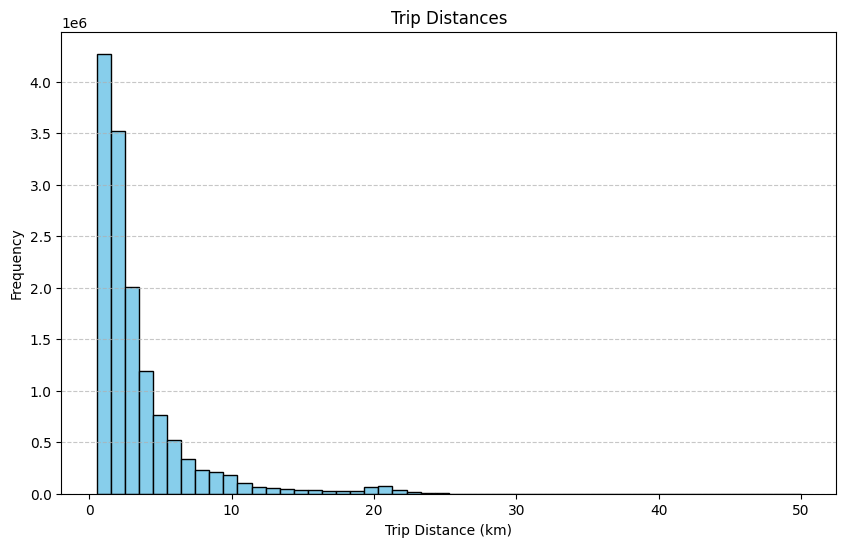

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(trip_distances, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Trip Distance (km)")
plt.ylabel("Frequency")
plt.title("Trip Distances")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:
df = pd.read_csv(file_name) 

In [11]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


medallion: 13426 unique values
hack_license: 32224 unique values
vendor_id: 2 unique values
rate_code: 14 unique values
store_and_fwd_flag: 2 unique values
pickup_datetime: 2303465 unique values
dropoff_datetime: 2305816 unique values
passenger_count: 10 unique values
trip_time_in_secs: 6594 unique values
trip_distance: 4368 unique values
pickup_longitude: 40442 unique values
pickup_latitude: 64511 unique values
dropoff_longitude: 56249 unique values
dropoff_latitude: 88766 unique values


In [12]:
numeric_fields = ['trip_time_in_secs', 'trip_distance', 'passenger_count']

min_values = {field: float('inf') for field in numeric_fields}
max_values = {field: float('-inf') for field in numeric_fields}

with open('trip_data_1.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        try:
            row = {key.strip(): value for key, value in row.items()}
            
            for field in numeric_fields:
                value = float(row[field])
                min_values[field] = min(min_values[field], value)
                max_values[field] = max(max_values[field], value)

        except ValueError:
            continue

for field in numeric_fields:
    print(f"{field} - Min: {min_values[field]}, Max: {max_values[field]}")


trip_time_in_secs - Min: 0.0, Max: 10800.0
trip_distance - Min: 0.0, Max: 100.0
passenger_count - Min: 0.0, Max: 255.0


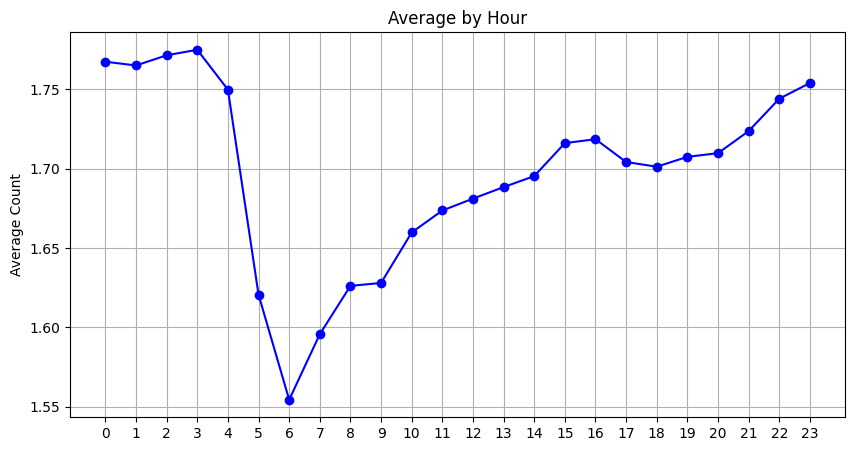

In [13]:
df["hour"] = pd.to_datetime(df["pickup_datetime"]).dt.hour
avg_passengers_per_hour = df.groupby("hour")["passenger_count"].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_passengers_per_hour.index, avg_passengers_per_hour.values, marker='o', linestyle='-', color='b')
plt.ylabel("Average Count")
plt.title("Average by Hour")
plt.xticks(range(24))
plt.grid()
plt.show()


In [14]:
reduced = df.iloc[::1000, :]
reduced.to_csv("reduced_taxi_data.csv", index=False)


C:\Users\Asus\AppData\Local\Temp\ipykernel_3620\333471153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced["hour"] = pd.to_datetime(reduced["pickup_datetime"]).dt.hour


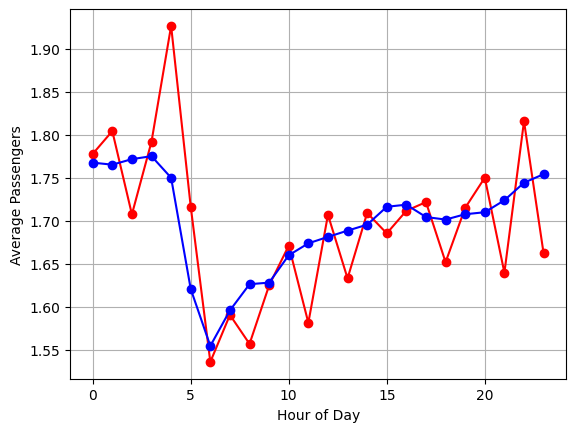

In [15]:
reduced["hour"] = pd.to_datetime(reduced["pickup_datetime"]).dt.hour
reduced_hourly_avg = reduced.groupby("hour")["passenger_count"].mean()

plt.plot(reduced_hourly_avg.index, reduced_hourly_avg.values, marker="o", color="red", label="Reduced")
plt.plot(avg_passengers_per_hour.index, avg_passengers_per_hour.values, marker="o", color="blue", label="Full")
plt.xlabel("Hour of Day")
plt.ylabel("Average Passengers")
plt.grid()
plt.show()
